In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.models import LinearColorMapper
import altair as alt


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


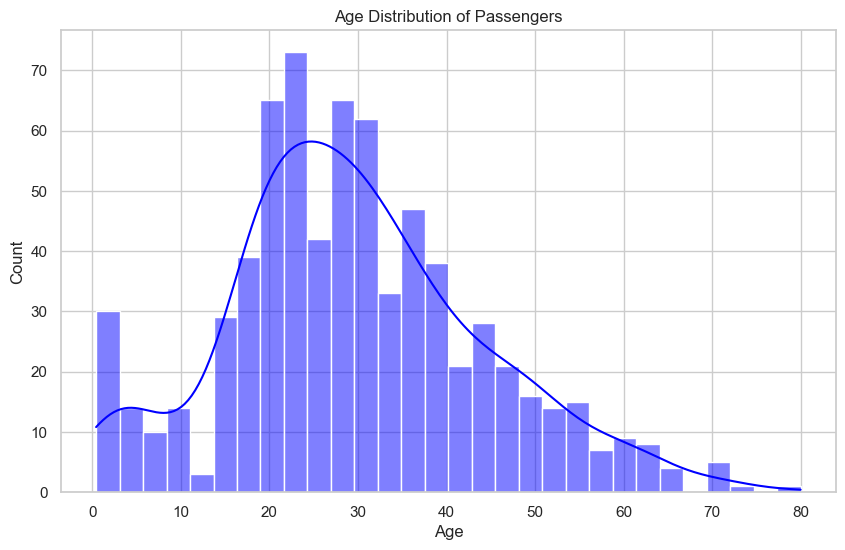

C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2643053103.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_data, palette='coolwarm')


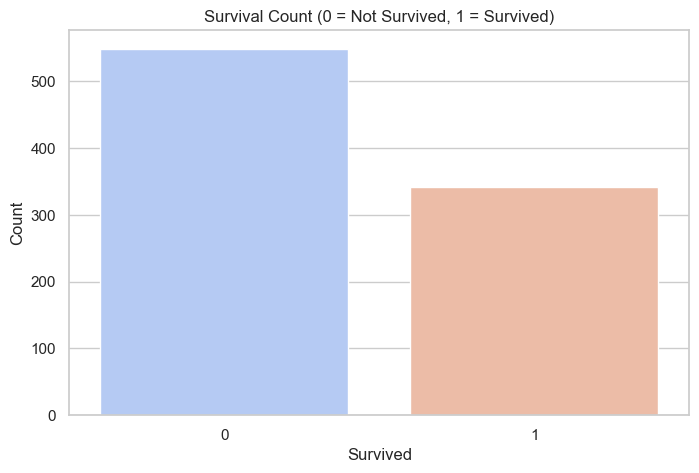

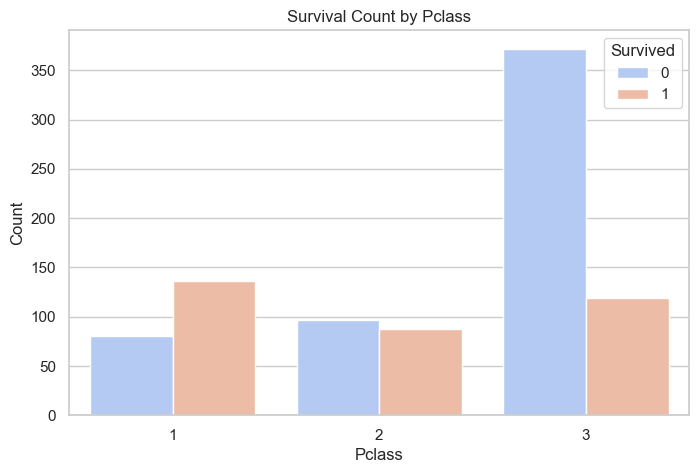

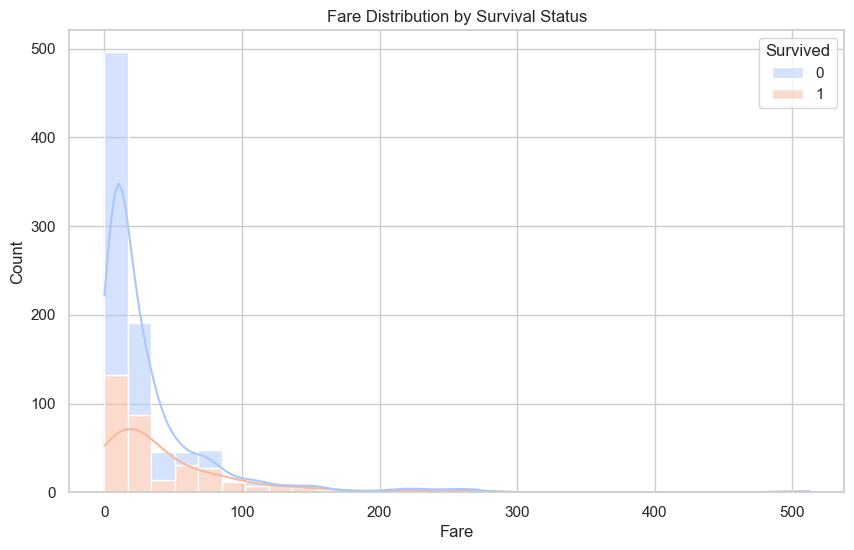

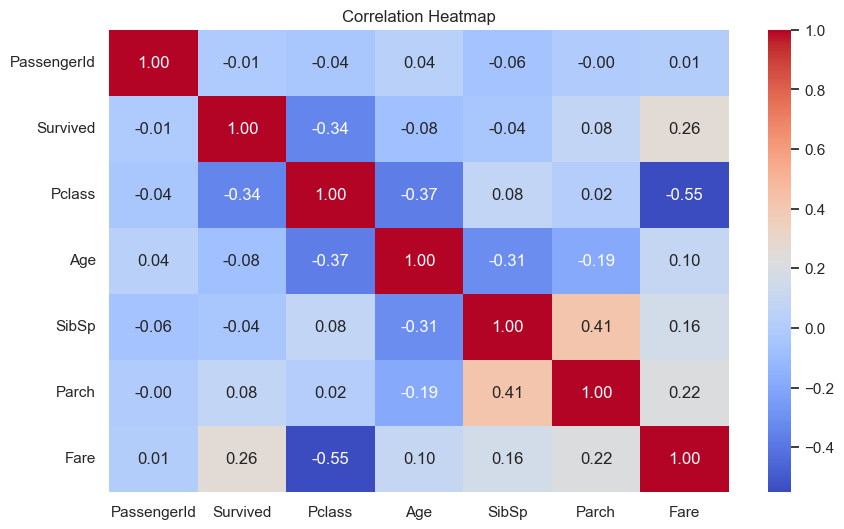

C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2643053103.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='pastel')


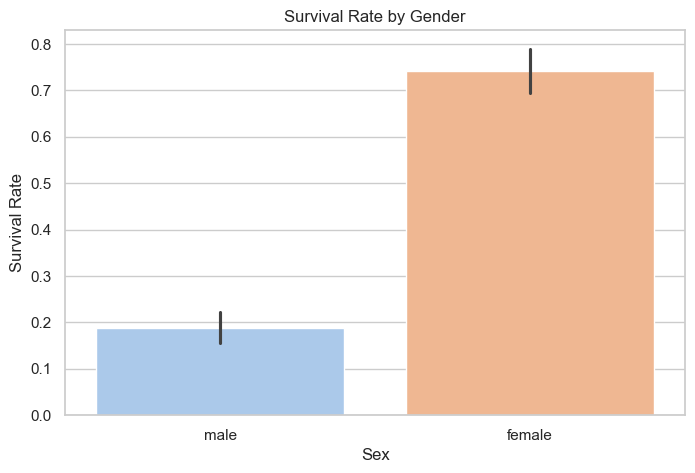

C:\Users\HP\AppData\Local\Temp\ipykernel_14356\2643053103.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_data, palette='Set2')


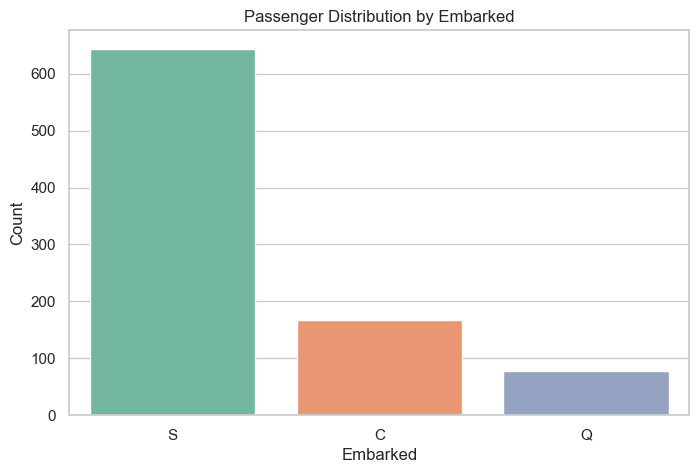

In [4]:

# Load Titanic dataset (replace with your actual dataset path)
titanic_data = pd.read_csv("titanic.csv")

# Display first few rows of the dataset
print(titanic_data.head())

# Set the style for Seaborn
sns.set(style="whitegrid")

# Plotting the distribution of ages
plt.figure(figsize=(10,6))
sns.histplot(titanic_data['Age'].dropna(), kde=True, color='blue', bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plotting the survival count (Survived vs. Not Survived)
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plotting the survival count by Pclass
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='coolwarm')
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Plotting the Fare distribution (with different survival status)
plt.figure(figsize=(10,6))
sns.histplot(data=titanic_data, x='Fare', hue='Survived', kde=True, multiple='stack', palette='coolwarm', bins=30)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Plotting the correlation heatmap between numerical features
plt.figure(figsize=(10,6))
# Select only the numerical columns (exclude non-numeric columns)
numerical_data = titanic_data.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Plotting a bar plot of survival by sex
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Plotting the distribution of passengers by Embarked location
plt.figure(figsize=(8,5))
sns.countplot(x='Embarked', data=titanic_data, palette='Set2')
plt.title('Passenger Distribution by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()


In [12]:

titanic_data = pd.read_csv("titanic.csv")

# -----------------------------
# 1. Age Distribution of Passengers
fig_age = px.histogram(titanic_data, x="Age", nbins=30, title="Age Distribution of Passengers", color_discrete_sequence=["blue"])
fig_age.update_layout(
    xaxis_title="Age",
    yaxis_title="Count",
    bargap=0.1
)
fig_age.show()

# -----------------------------
# 2. Survival Count (Survived vs. Not Survived)
survival_counts = titanic_data['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']  # Rename columns to match the plot parameters

fig_survival = px.bar(survival_counts, 
                      x='Survived', y='Count', 
                      labels={'Survived': 'Survival Status', 'Count': 'Count'},
                      title="Survival Count (0 = Not Survived, 1 = Survived)", 
                      color='Survived', 
                      color_discrete_sequence=px.colors.qualitative.Set1)
fig_survival.show()

# -----------------------------
# 3. Survival Count by Pclass
fig_pclass_survival = px.histogram(titanic_data, x="Pclass", color="Survived", barmode="group", 
                                    title="Survival Count by Pclass", 
                                    labels={"Pclass": "Pclass", "Survived": "Survival Status"})
fig_pclass_survival.update_layout(
    xaxis_title="Pclass",
    yaxis_title="Count"
)
fig_pclass_survival.show()

# -----------------------------
# 4. Fare Distribution by Survival Status
fig_fare = px.histogram(titanic_data, x="Fare", color="Survived", nbins=30, 
                        title="Fare Distribution by Survival Status", 
                        labels={"Fare": "Fare", "Survived": "Survival Status"},
                        color_discrete_sequence=px.colors.qualitative.Set1)
fig_fare.show()

# -----------------------------
# 5. Correlation Heatmap
numerical_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

fig_correlation = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='RdBu',
    colorbar=dict(title='Correlation'),
    zmin=-1, zmax=1
))

fig_correlation.update_layout(
    title="Correlation Heatmap",
    xaxis_title="Features",
    yaxis_title="Features",
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=45),
    width=800,
    height=800
)
fig_correlation.show()

# -----------------------------
# 6. Survival Rate by Gender
fig_gender_survival = px.bar(titanic_data.groupby('Sex')['Survived'].mean().reset_index(), 
                             x='Sex', y='Survived', 
                             title="Survival Rate by Gender", 
                             labels={"Sex": "Gender", "Survived": "Survival Rate"},
                             color='Sex',
                             color_discrete_sequence=px.colors.qualitative.Set1)
fig_gender_survival.show()

# -----------------------------
# 7. Passenger Distribution by Embarked Location
embarked_counts = titanic_data['Embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked', 'Count']  # Rename columns to match the plot parameters

fig_embarked = px.bar(embarked_counts, 
                      x='Embarked', y='Count', 
                      title="Passenger Distribution by Embarked Location", 
                      labels={'Embarked': 'Embarked Location', 'Count': 'Count'},
                      color='Embarked', 
                      color_discrete_sequence=px.colors.qualitative.Set1)
fig_embarked.show()



In [25]:

# Load Titanic dataset (replace with your actual dataset path)
titanic_data = pd.read_csv("titanic.csv")

# -----------------------------
# 1. Age Distribution of Passengers
age_hist, age_bins = np.histogram(titanic_data['Age'].dropna(), bins=30)

age_source = ColumnDataSource(data=dict(
    top=age_hist,
    left=age_bins[:-1],
    right=age_bins[1:],
    bottom=[0] * len(age_hist)
))

fig_age = figure(title="Age Distribution of Passengers", 
                 x_axis_label='Age', y_axis_label='Count', 
                 tools="pan,box_zoom,reset,hover")

fig_age.quad(top='top', bottom='bottom', left='left', right='right', 
             source=age_source, fill_color="skyblue", line_color="white")
show(fig_age)

# -----------------------------
# 2. Survival Count (Survived vs. Not Survived)
survival_counts = titanic_data['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']

survival_source = ColumnDataSource(survival_counts)

fig_survival = figure(x_range=["0", "1"], title="Survival Count",
                      tools="pan,box_zoom,reset,hover", 
                      x_axis_label='Survived', y_axis_label='Count')

fig_survival.vbar(x='Survived', top='Count', width=0.9, source=survival_source, 
                  legend_field="Survived", color=Spectral11[0])

fig_survival.legend.title = 'Survival Status'
show(fig_survival)

# -----------------------------
# 3. Survival Count by Pclass
survival_by_pclass = titanic_data.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
survival_by_pclass_source = ColumnDataSource(survival_by_pclass)

fig_pclass_survival = figure(x_range=["1", "2", "3"], title="Survival Count by Pclass",
                             tools="pan,box_zoom,reset,hover", 
                             x_axis_label='Pclass', y_axis_label='Count')

fig_pclass_survival.vbar(x='Pclass', top='Count', width=0.9, source=survival_by_pclass_source, 
                         legend_field="Survived", color='green')

fig_pclass_survival.legend.title = 'Survival Status'
show(fig_pclass_survival)

# -----------------------------
# 4. Fare Distribution by Survival Status
fare_survival_counts = titanic_data[['Fare', 'Survived']].dropna()
fare_survival_counts_grouped = fare_survival_counts.groupby('Survived').Fare.describe().reset_index()

fare_survival_source = ColumnDataSource(fare_survival_counts_grouped)

fig_fare = figure(title="Fare Distribution by Survival Status", 
                  x_axis_label="Survival Status", y_axis_label="Fare", 
                  tools="pan,box_zoom,reset")

# Box plot-like appearance: using vbar for grouped fare data
fig_fare.vbar(x='Survived', top='75%', width=0.9, source=fare_survival_source, legend_field="Survived", 
              color=Spectral11[0], alpha=0.7, line_color="white")

show(fig_fare)

# -----------------------------
# 2. Correlation Heatmap (Using rect)
numerical_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Prepare data for a heatmap-like plot
correlation_source = ColumnDataSource(data=dict(
    x=np.tile(correlation_matrix.columns, len(correlation_matrix.columns)),
    y=np.repeat(correlation_matrix.columns, len(correlation_matrix.columns)),
    correlation_value=correlation_matrix.values.flatten()
))

# Create the figure
fig_corr = figure(title="Correlation Heatmap", 
                  tools="pan,box_zoom,reset,hover", 
                  x_axis_label='Features', y_axis_label='Features', 
                  x_range=list(correlation_matrix.columns), 
                  y_range=list(correlation_matrix.columns))

# Create the color mapper for correlation values
mapper = LinearColorMapper(palette=Viridis256, low=-1, high=1)

# Create the heatmap using rect() based on correlation value
fig_corr.rect(x='x', y='y', width=1, height=1, source=correlation_source,
              fill_color={'field': 'correlation_value', 'transform': mapper}, line_color=None)

# Add color bar
color_bar = ColorBar(color_mapper=mapper, location=(0, 0), title="Correlation")
fig_corr.add_layout(color_bar, 'right')

# Show the plot
output_notebook()  # To show the plot in Jupyter Notebooks
show(fig_corr)
# -----------------------------
# 3. Survival Rate by Gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean().reset_index()
survival_by_gender_source = ColumnDataSource(survival_by_gender)

fig_gender_survival = figure(x_range=["male", "female"], title="Survival Rate by Gender",
                             tools="pan,box_zoom,reset,hover", 
                             x_axis_label='Gender', y_axis_label='Survival Rate')

fig_gender_survival.vbar(x='Sex', top='Survived', width=0.9, source=survival_by_gender_source, 
                         legend_field="Sex", color=Spectral11[4])

fig_gender_survival.legend.title = 'Gender'
show(fig_gender_survival)

# -----------------------------
# 4. Passenger Distribution by Embarked Location
embarked_counts = titanic_data['Embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked', 'Count']

embarked_source = ColumnDataSource(embarked_counts)

fig_embarked = figure(x_range=["C", "Q", "S"], title="Passenger Distribution by Embarked Location",
                      tools="pan,box_zoom,reset,hover", 
                      x_axis_label='Embarked Location', y_axis_label='Count')

fig_embarked.vbar(x='Embarked', top='Count', width=0.9, source=embarked_source, 
                  legend_field="Embarked", color=Spectral11[6])

fig_embarked.legend.title = 'Embarked Location'
show(fig_embarked)

Loading BokehJS ...

In [27]:

# Load Titanic dataset (assuming your dataset is in a DataFrame named `titanic_data`)
# titanic_data = pd.read_csv('titanic.csv')

# 1. Age Distribution
age_distribution = alt.Chart(titanic_data.dropna(subset=['Age'])).mark_bar().encode(
    alt.X('Age:Q', bin=True),
    alt.Y('count():Q'),
    alt.Color('Age:Q', scale=alt.Scale(scheme='viridis')),
).properties(title='Age Distribution')

# 2. Survival Count (Survived vs. Not Survived)
survival_count = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Survived:N'),
    alt.Y('count():Q'),
    alt.Color('Survived:N', scale=alt.Scale(domain=[0, 1], range=['red', 'green']))
).properties(title="Survival Count (0 = Not Survived, 1 = Survived)")

# 3. Survival Count by Pclass
survival_by_pclass = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Pclass:N'),
    alt.Y('count():Q'),
    alt.Color('Survived:N', scale=alt.Scale(domain=[0, 1], range=['red', 'green']))
).properties(title="Survival Count by Pclass")

# 4. Fare Distribution by Survival Status
fare_survival = alt.Chart(titanic_data.dropna(subset=['Fare'])).mark_boxplot().encode(
    alt.X('Survived:N'),
    alt.Y('Fare:Q')
).properties(title="Fare Distribution by Survival Status")

# 5. Correlation Heatmap
numerical_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Convert correlation matrix to long-form data for Altair
correlation_data = pd.DataFrame(np.triu(correlation_matrix, k=1))
correlation_data = correlation_data.stack().reset_index(name='correlation_value')
correlation_data.columns = ['feature_1', 'feature_2', 'correlation_value']

# Create a correlation heatmap-like chart
heatmap = alt.Chart(correlation_data).mark_rect().encode(
    alt.X('feature_1:N', title='Feature 1'),
    alt.Y('feature_2:N', title='Feature 2'),
    alt.Color('correlation_value:Q', scale=alt.Scale(scheme='viridis')),
    alt.Tooltip(['feature_1', 'feature_2', 'correlation_value'])
).properties(title="Correlation Heatmap")

# 6. Survival Rate by Gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean().reset_index()

survival_gender_chart = alt.Chart(survival_by_gender).mark_bar().encode(
    alt.X('Sex:N'),
    alt.Y('Survived:Q'),
    alt.Color('Sex:N')
).properties(title="Survival Rate by Gender")

# 7. Passenger Distribution by Embarked Location
embarked_distribution = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Embarked:N'),
    alt.Y('count():Q'),
    alt.Color('Embarked:N', scale=alt.Scale(scheme='category10'))
).properties(title="Passenger Distribution by Embarked Location")

# Show all charts together
age_distribution.show()
survival_count.show()
survival_by_pclass.show()
fare_survival.show()
heatmap.show()
survival_gender_chart.show()
embarked_distribution.show()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

In [ ]:
import dash
import dash.dcc as dcc
import dash.html as html
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Load Titanic dataset (replace with the path to your CSV file)
titanic_data = pd.read_csv('titanic.csv')  # Update the file path if necessary

# Create Dash app
app = dash.Dash(__name__)

# 1. Age Distribution
age_distribution = px.histogram(titanic_data, x='Age', nbins=30, 
                                 title="Age Distribution")

# 2. Survival Count (Survived vs. Not Survived)
# Get the value counts for the 'Survived' column, reset index and rename the columns to match expectations
survival_count_df = titanic_data['Survived'].value_counts().reset_index(name='Count')
survival_count_df.columns = ['Survived', 'Count']  # Rename the columns for better labels

# Now, plot the bar chart
survival_count = px.bar(survival_count_df, 
                        x='Survived', y='Count', 
                        labels={'Survived': 'Survival Status', 'Count': 'Count'},
                        title="Survival Count (0 = Not Survived, 1 = Survived)", 
                        color='Survived',  # Color the bars by survival status
                        color_discrete_map={0: 'red', 1: 'green'})  # Custom color for survival status


# 3. Survival Count by Pclass
survival_by_pclass = px.bar(titanic_data, x='Pclass', color='Survived', 
                            title="Survival Count by Pclass", barmode='stack', 
                            labels={'Pclass': 'Passenger Class', 'Survived': 'Survival Status'})

# 4. Fare Distribution by Survival Status
fare_survival = px.box(titanic_data, x='Survived', y='Fare', color='Survived',
                       title="Fare Distribution by Survival Status", 
                       labels={'Survived': 'Survival Status', 'Fare': 'Fare'})

# 5. Correlation Heatmap
numerical_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Create the heatmap using plotly
correlation_heatmap = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='Viridis'
))
correlation_heatmap.update_layout(title="Correlation Heatmap", xaxis_title='Features', yaxis_title='Features')

# 6. Survival Rate by Gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean().reset_index()
survival_gender_chart = px.bar(survival_by_gender, x='Sex', y='Survived', color='Sex',
                               title="Survival Rate by Gender", labels={'Sex': 'Gender', 'Survived': 'Survival Rate'})

# 7. Passenger Distribution by Embarked Location
embarked_distribution = px.bar(titanic_data, x='Embarked', title="Passenger Distribution by Embarked Location", 
                               labels={'Embarked': 'Embarked Location'})

# Define the app layout
app.layout = html.Div(children=[
    html.H1(children='Titanic Data Visualizations'),

    # 1. Age Distribution
    dcc.Graph(
        id='age-distribution',
        figure=age_distribution
    ),

    # 2. Survival Count
    dcc.Graph(
        id='survival-count',
        figure=survival_count
    ),

    # 3. Survival Count by Pclass
    dcc.Graph(
        id='survival-by-pclass',
        figure=survival_by_pclass
    ),

    # 4. Fare Distribution by Survival Status
    dcc.Graph(
        id='fare-survival',
        figure=fare_survival
    ),

    # 5. Correlation Heatmap
    dcc.Graph(
        id='correlation-heatmap',
        figure=correlation_heatmap
    ),

    # 6. Survival Rate by Gender
    dcc.Graph(
        id='survival-by-gender',
        figure=survival_gender_chart
    ),

    # 7. Passenger Distribution by Embarked Location
    dcc.Graph(
        id='embarked-distribution',
        figure=embarked_distribution
    ),
])

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


---------------------------------------------------------------------------
MethodNotAllowed                          Traceback (most recent call last)
MethodNotAllowed: 405 Method Not Allowed: The method is not allowed for the requested URL.

---------------------------------------------------------------------------
MethodNotAllowed                          Traceback (most recent call last)
MethodNotAllowed: 405 Method Not Allowed: The method is not allowed for the requested URL.

---------------------------------------------------------------------------
MethodNotAllowed                          Traceback (most recent call last)
MethodNotAllowed: 405 Method Not Allowed: The method is not allowed for the requested URL.

---------------------------------------------------------------------------
MethodNotAllowed                          Traceback (most recent call last)
MethodNotAllowed: 405 Method Not Allowed: The method is not allowed for the requested URL.

------------------------

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


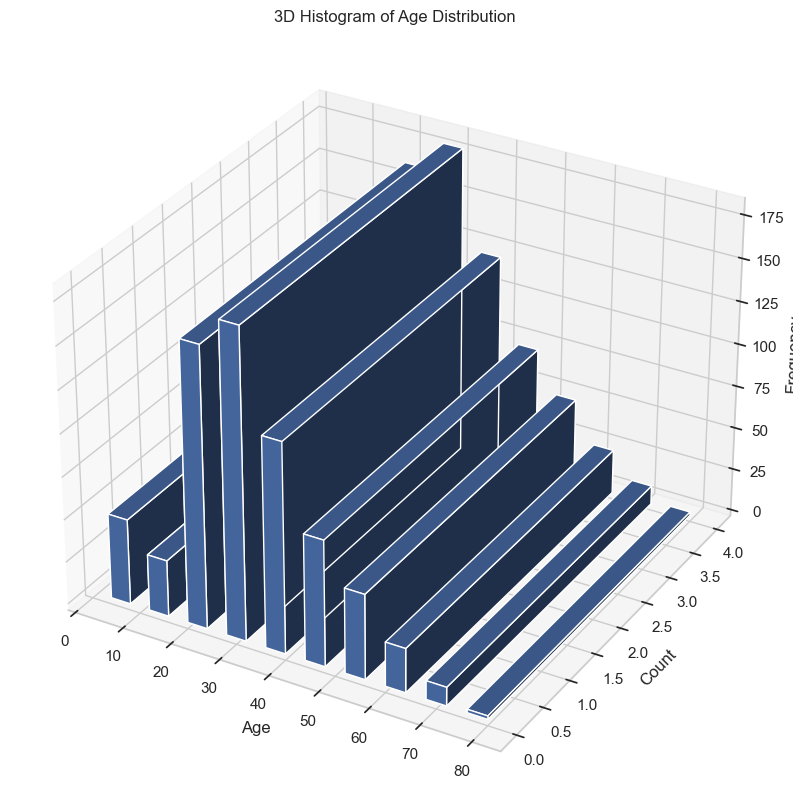

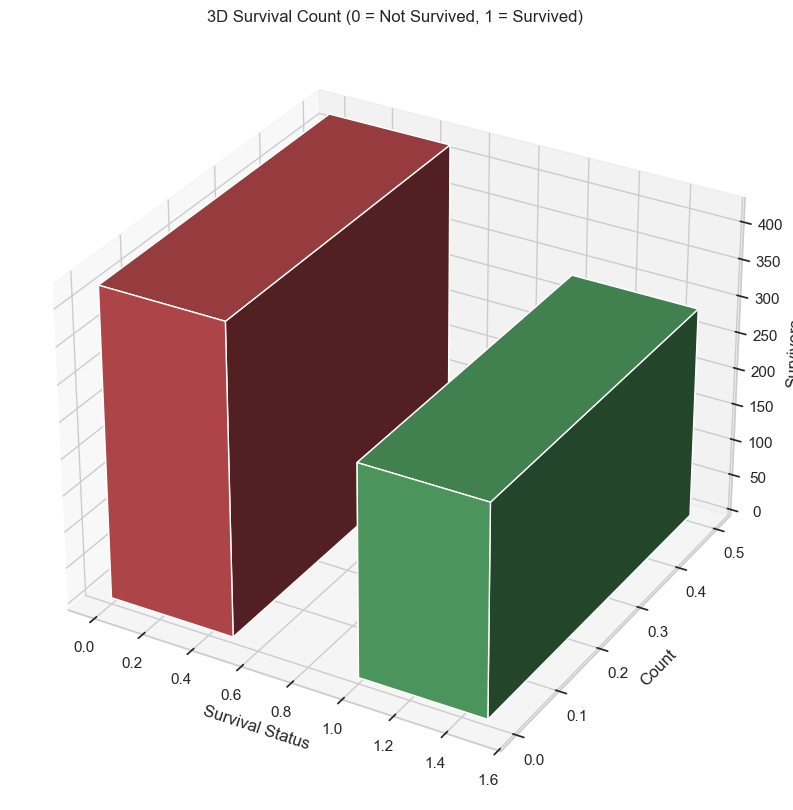

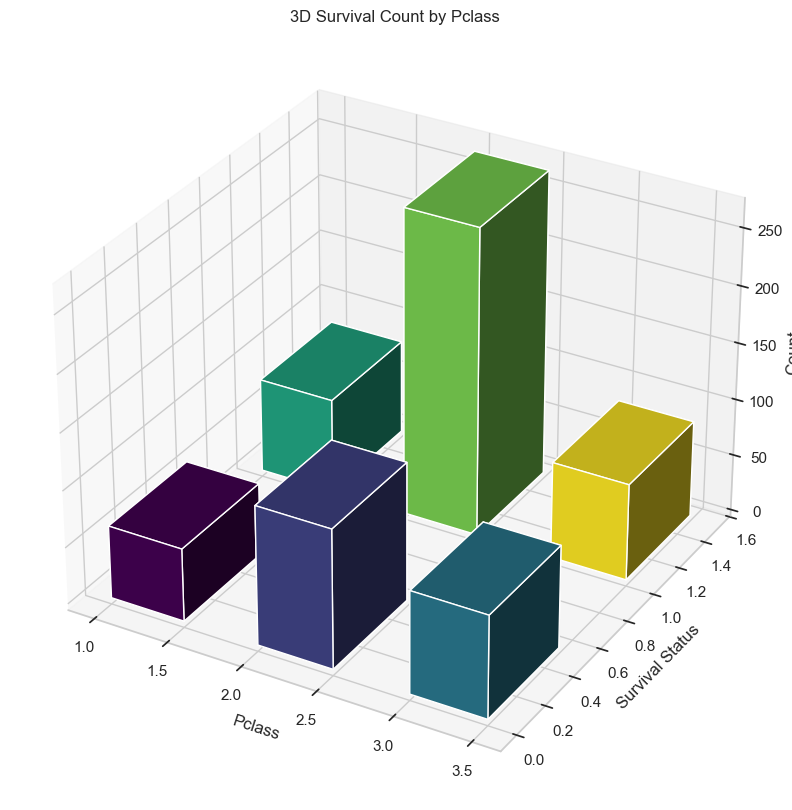

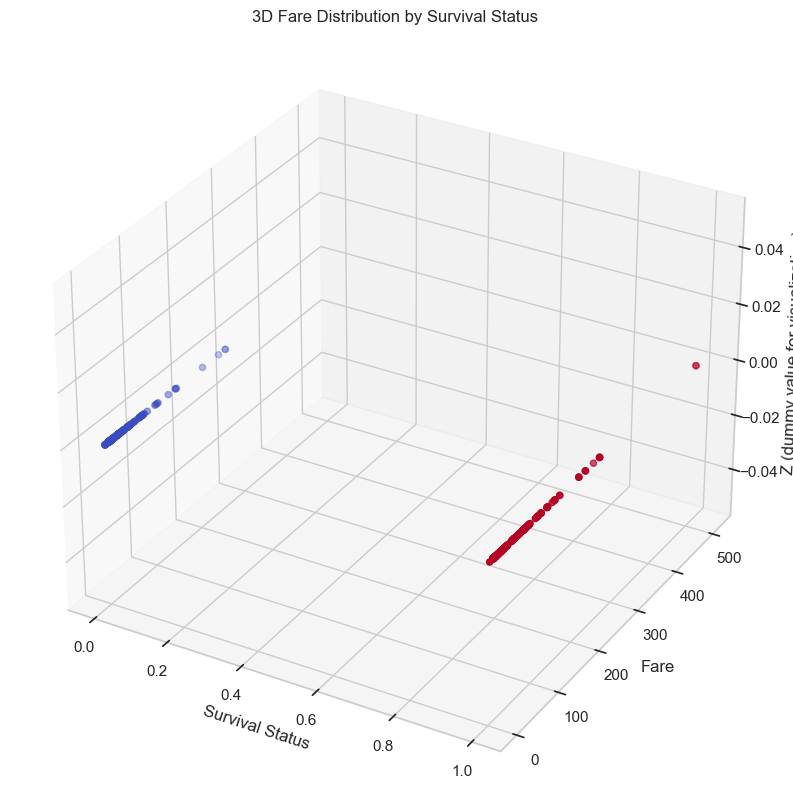

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load Titanic dataset using Seaborn
titanic_data = sns.load_dataset('titanic')

# Inspect the column names to see the correct ones
print(titanic_data.columns)

# Drop rows with missing values for simplicity
# Adjust column names based on the dataset
titanic_data = titanic_data.dropna(subset=['age', 'fare', 'survived', 'pclass'])

# ---- 1. Age Distribution (3D Histogram) ----
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get the 'Age' data
x = titanic_data['age']
y = np.zeros_like(x)  # Set y to zeros (1D data for plotting)
z = np.zeros_like(x)  # Set z to zeros (1D data for plotting)

# Create the 3D histogram (bins = 10 for age distribution)
hist, bins = np.histogram(x, bins=10, range=(0, 80))
xpos = (bins[:-1] + bins[1:]) / 2  # Midpoint of each bin
ypos = np.zeros_like(xpos)  # All y-values are 0 for a 2D plot
zpos = np.zeros_like(xpos)  # All z-values are 0 for a 2D plot

# Set the width of the bars (1D in the y direction)
dx = np.ones_like(xpos) * 4
dy = np.ones_like(xpos) * 4
dz = hist  # Heights are the frequency count of passengers in each bin

# Plot the bars for the 3D histogram
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Age Distribution')

plt.show()

# ---- 2. Survival Count (Survived vs. Not Survived) ----
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Data for survival count
survived_count = titanic_data['survived'].value_counts()
x = survived_count.index  # 0 = Not Survived, 1 = Survived
y = np.zeros_like(x)  # Y-axis (set to 0 for simplicity)
z = np.zeros_like(x)  # Z-axis (set to 0 for simplicity)
dz = survived_count.values  # Z-axis value is the count of survivors

# Plot the bars
ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=dz, color=['r', 'g'], zsort='average')

ax.set_xlabel('Survival Status')
ax.set_ylabel('Count')
ax.set_zlabel('Survivors')
ax.set_title('3D Survival Count (0 = Not Survived, 1 = Survived)')

plt.show()

# ---- 3. Survival Count by Pclass (3D Bar Plot) ----
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Data for survival count by Pclass
survival_by_pclass = titanic_data.groupby(['pclass', 'survived']).size().unstack(fill_value=0)
x, y = np.meshgrid(survival_by_pclass.index, survival_by_pclass.columns)
x = x.flatten()
y = y.flatten()
z = np.zeros_like(x)  # Set z to 0 for the base

# Height of bars
dz = survival_by_pclass.values.flatten()

# Generate a list of colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(dz)))

# Plot the 3D bars
ax.bar3d(x, y, z, dx=0.5, dy=0.5, dz=dz, color=colors, zsort='average')

ax.set_xlabel('Pclass')
ax.set_ylabel('Survival Status')
ax.set_zlabel('Count')
ax.set_title('3D Survival Count by Pclass')

plt.show()

# ---- 4. Fare Distribution by Survival Status (3D Scatter Plot) ----
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Data for Fare and Survival status
x = titanic_data['survived']  # 0 = Not Survived, 1 = Survived
y = titanic_data['fare']
z = np.zeros_like(x)  # Setting Z to zero for 2D scatter in the 3D plot

# Plotting the scatter plot
scatter = ax.scatter(x, y, z, c=x, cmap='coolwarm', marker='o')

ax.set_xlabel('Survival Status')
ax.set_ylabel('Fare')
ax.set_zlabel('Z (dummy value for visualization)')
ax.set_title('3D Fare Distribution by Survival Status')

plt.show()


In [67]:
import seaborn as sns
import pandas as pd
import chartify

# Load Titanic dataset from Seaborn
titanic_data = sns.load_dataset('titanic')

# Drop rows with missing values for essential columns (age, fare, survived, pclass)
titanic_data.dropna(subset=['age', 'fare', 'survived', 'pclass'], inplace=True)

# Create a line plot for Age vs. Passenger Index (this is just an example, you can customize it)
ch_line = chartify.Chart()
ch_line.set_title("Titanic Dataset - Line Plot")
ch_line.set_subtitle("Age Trend of Passengers")
ch_line.axes.set_xaxis_label("Index")
ch_line.axes.set_yaxis_label("Age (years)")
ch_line.plot.line(
    data_frame=titanic_data.reset_index(), x_column="index", y_column="age", color_column="survived"
)
ch_line.show()


# Create a scatter plot for Age vs. Fare (Survival Status as color)
ch_scatter = chartify.Chart()
ch_scatter.set_title("Titanic Dataset - Scatter Plot")
ch_scatter.set_subtitle("Age vs Fare")
ch_scatter.axes.set_xaxis_label("Age (years)")
ch_scatter.axes.set_yaxis_label("Fare (in dollars)")

ch_scatter.plot.scatter(
    data_frame=titanic_data,
    x_column="age",
    y_column="fare",
    color_column="survived"
)

ch_scatter.show()
